In [ ]:
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
dataset = pd.read_csv('reporte_interruptores.csv' , sep=";")

In [ ]:
# Convertir la columna 'Fecha' a datetime
dataset['Fecha'] = pd.to_datetime(dataset['Fecha'], format='%d-%m-%Y', errors='coerce')

# Verificar si hay valores no válidos
invalid_dates = dataset.loc[dataset['Fecha'].isnull(), 'Fecha']
print("Valores no válidos después de la conversión de fecha:")
print(invalid_dates)

# Verificar si los días del 13 al 31 están presentes
dias_despues_limpieza = dataset['Fecha'].dt.day.unique()
print("Días en el conjunto de datos después de la limpieza:", sorted(dias_despues_limpieza))



Valores no válidos después de la conversión de fecha:
0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
9494   NaT
9495   NaT
9496   NaT
9502   NaT
9504   NaT
Name: Fecha, Length: 4803, dtype: datetime64[ns]
Días en el conjunto de datos después de la limpieza: [nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0]


In [ ]:
# Eliminar celdas vacías
dataset = dataset.dropna(subset=['Fecha'])

# Convertir la columna a formato unitario
dataset['Fecha'] = pd.to_datetime(dataset['Fecha'], errors='coerce')

# Verificar si hay valores invalidos
invalid_dates = dataset.loc[dataset['Fecha'].isnull(), 'Fecha']
print("Valores no válidos:", invalid_dates)

# Eliminar filas
dataset = dataset.dropna(subset=['Fecha'])

# Verificar los datos después de la limpieza
print(dataset['Fecha'].dtype)

dataset["Corriente"] = dataset["Corriente"].str.replace(',', '.')  # Reemplaza comas por puntos
dataset["Corriente"] = pd.to_numeric(dataset["Corriente"], errors='coerce')  # Convierte a tipo float

Valores no válidos: Series([], Name: Fecha, dtype: datetime64[ns])
datetime64[ns]


<ipython-input-35-f568ab58eca4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Fecha'] = pd.to_datetime(dataset['Fecha'], errors='coerce')


In [ ]:
# Verificar si los datos originales contienen fechas del 13 al 31
fechas_originales = dataset['Fecha']
dias_originales = fechas_originales.dt.day.unique()
print("Días en el conjunto de datos original:", sorted(dias_originales))

# Verificar los valores no válidos después de la conversión de fecha
print("Valores no válidos después de la conversión de fecha:")
invalid_dates = dataset.loc[dataset['Fecha'].isnull(), 'Fecha']
print(invalid_dates)

# Verificar si los días del 13 al 31 están presentes en el conjunto de datos después de la limpieza
dias_despues_limpieza = dataset['Fecha'].dt.day.unique()
print("Días en el conjunto de datos después de la limpieza:", sorted(dias_despues_limpieza))


Días en el conjunto de datos original: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Valores no válidos después de la conversión de fecha:
Series([], Name: Fecha, dtype: datetime64[ns])
Días en el conjunto de datos después de la limpieza: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4702 entries, 60 to 9503
Data columns (total 31 columns):
 #   Column                                                                                                 Non-Null Count  Dtype         
---  ------                                                                                                 --------------  -----         
 0   ID                                                                                                     4702 non-null   int64         
 1   Subestaciones                                                                                          4702 non-null   object        
 2   Nombre Paño-Barra                                                                                      4702 non-null   object        
 3   Nombre Interruptor                                                                                     4702 non-null   object        
 4   Nombre Centro Control                                     

In [ ]:
dataset.head()

,ID,Subestaciones,Nombre Paño-Barra,Nombre Interruptor,Nombre Centro Control,Nombre Propietario,Nombre Coordinado,Número,Nemotecnico,Descripcion,...,4.13 Tiempo de Cierre,4.14 Sistemas de protección,Fecha,4.17 Modelo,4.18 fabricante,"4.19 Tipo de medio aislante (aceite, neumático, SF6, entre otros)","4.20 Tipo de accionamiento (hidráulico, resorte, etc.)","4.21 Especificación de la norma de fabricación (institución emisora, número, año)",1 Datos de placa y hoja de datos (*.jpg o *.pdf),"2 Hoja de vida del equipo. informando fecha de fabricación, lugares donde se utilizó, etc."
60,15110,S/E ACCESO NORTE,S/E ACCESO NORTE H1,IM S/E ACCESO NORTE H1,NaN,SQM SALAR S.A.,SQM SALAR S.A,1,IM01L0152PA001L0152SE011L0152,NaN,...,"3,5",ID22060 - SP S/E ACCESO NORTE H1\nID22061 - SP...,2023-01-31,LTB 145D1/B,ABB,SF6,RESORTE,"IEC, 62271-100",Datos de placa y hoja de datos.zip,Hoja de vida.xlsx
61,12390,S/E ACL,S/E ACL H1,IM S/E ACL H1,"ECOMETALES LIMITED, AGENCIA EN CHILE","ECOMETALES LIMITED, AGENCIA EN CHILE","ECOMETALES LIMITED, AGENCIA EN CHILE",1,IM01L0108PA001L0108SE014L0108,NaN,...,"4,085",no aplica,2002-06-04,GL-312 F1,ALSTOM,SF6,RESORTE,Std. IEC 62271-100,jpg - ING060-DS-ELE-003-0_Interruptor.pdf / Pl...,Hoja de vida del equipo IM SE ACL H1
62,257,S/E ACONCAGUA,S/E ACONCAGUA B1,IM S/E ACONCAGUA B1,CELEO REDES CHILE LTDA,ALFA TRANSMISORA DE ENERGÍA S.A.,ALFA TRANSMISORA DE ENERGÍA S.A.,1,IM01T0061PA009T0061SE022T0061,NaN,...,3,no aplica,1994-12-31,ABB EDF SK 1-1,ABB,SF6,RESORTE,IEC 56,SE_Acnc 52B1,Hoja de vida 52B1
63,255,S/E ACONCAGUA,S/E ACONCAGUA B2,IM S/E ACONCAGUA B2,CELEO REDES CHILE LTDA,ALFA TRANSMISORA DE ENERGÍA S.A.,ALFA TRANSMISORA DE ENERGÍA S.A.,1,IM01T0061PA007T0061SE022T0061,NaN,...,3,no aplica,1994-12-31,ABB EDF SK 1-1,ABB,SF6,RESORTE,IEC 56,SE_Acnc 52B2,Hoja de vida 52B2
64,250,S/E ACONCAGUA,S/E ACONCAGUA B3,IM S/E ACONCAGUA B3,CELEO REDES CHILE LTDA,ALFA TRANSMISORA DE ENERGÍA S.A.,ALFA TRANSMISORA DE ENERGÍA S.A.,1,IM01T0061PA002T0061SE022T0061,NaN,...,3,no aplica,1994-12-31,ABB EDF SK 1-1,ABB,SF6,RESORTE,IEC 56,SE_Acnc 52B3,Hoja de vida 52B3


In [ ]:
columnas_a_utilizar = ['4.9 Modo de accionamiento (monopolar o tripolar)', 'Corriente', 'Fecha']
datos = dataset[columnas_a_utilizar]

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4702 entries, 60 to 9503
Data columns (total 3 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   4.9 Modo de accionamiento (monopolar o tripolar)  4702 non-null   object        
 1   Corriente                                         4695 non-null   float64       
 2   Fecha                                             4702 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 146.9+ KB


In [ ]:
datos.head()

,4.9 Modo de accionamiento (monopolar o tripolar),Corriente,Fecha
60,TRIPOLAR,1250.0,2023-01-31
61,MONOPOLAR,3150.0,2002-06-04
62,TRIPOLAR,2500.0,1994-12-31
63,TRIPOLAR,2500.0,1994-12-31
64,TRIPOLAR,2500.0,1994-12-31


In [ ]:
train=datos.query("Fecha.dt.year>2000 and Fecha.dt.year <2025")

In [ ]:
test=datos.query("Fecha.dt.year==2021")

In [ ]:
serie_test=test.groupby(["4.9 Modo de accionamiento (monopolar o tripolar)","Fecha"]).agg("sum")
serie_test.to_csv("test.csv")

In [ ]:
serie_train=train.groupby(["4.9 Modo de accionamiento (monopolar o tripolar)","Fecha"]).agg("sum")
serie_train.to_csv("train.csv")

In [ ]:
#Entrenar
ds_train=pd.read_csv("train.csv")
ds_train["Fecha"]=pd.to_datetime(ds_train["Fecha"],format="%Y-%m-%d")
ds_train=ds_train.set_index("Fecha")
ds_train.head()

,4.9 Modo de accionamiento (monopolar o tripolar),Corriente
Fecha,,
2001-01-01,MONOPOLAR,22050.0
2001-03-25,MONOPOLAR,8000.0
2002-01-01,MONOPOLAR,12600.0
2002-01-25,MONOPOLAR,2000.0
2002-06-04,MONOPOLAR,3150.0


In [ ]:
#Testear
ds_test=pd.read_csv("test.csv")
ds_test["Fecha"]=pd.to_datetime(ds_test["Fecha"],format="%Y-%m-%d")
ds_test=ds_test.set_index("Fecha")
ds_test.head()

,4.9 Modo de accionamiento (monopolar o tripolar),Corriente
Fecha,,
2021-01-05,MONOPOLAR,4000.0
2021-01-09,MONOPOLAR,4000.0
2021-01-12,MONOPOLAR,18900.0
2021-01-15,MONOPOLAR,3150.0
2021-02-18,MONOPOLAR,25200.0


In [ ]:
conteo_subestaciones = ds_train['4.9 Modo de accionamiento (monopolar o tripolar)'].value_counts()
subestacion_max_datos = conteo_subestaciones.idxmax()
cantidad_max_datos = conteo_subestaciones.max()

print(f"ma datos'{subestacion_max_datos}' con {cantidad_max_datos} datos.")



ma datos'TRIPOLAR' con 506 datos.


In [ ]:
import pandas as pd

# Extraer el año de la columna fecha
dataset['Año'] = dataset['Fecha'].dt.year

# Agrupar por año y tipo de datos y contar los registros
conteo_por_año_tipo = dataset.groupby(['Año', '4.9 Modo de accionamiento (monopolar o tripolar)']).size().reset_index(name='Cantidad')

# Encontrar el año con la mayor cantidad de registros y el tipo de datos asociado
año_mayor_cantidad = conteo_por_año_tipo.loc[conteo_por_año_tipo['Cantidad'].idxmax()]

# Imprimir los resultados
print("El tipo de datos más común es '{}' y se encuentra en el año {} con {} registros.".format(año_mayor_cantidad['4.9 Modo de accionamiento (monopolar o tripolar)'], año_mayor_cantidad['Año'], año_mayor_cantidad['Cantidad']))


El tipo de datos más común es 'TRIPOLAR' y se encuentra en el año 2021 con 540 registros.


In [ ]:
import pandas as pd

# Extraer el año de la columna "Fecha"
dataset['Año'] = dataset['Fecha'].dt.year

# Agrupar por un rango de 3 años y contar los registros en cada rango
conteo_por_rango_años = dataset.groupby(pd.cut(dataset['Año'], bins=range(dataset['Año'].min(), dataset['Año'].max() + 1, 5))).size().reset_index(name='Cantidad')

# Encontrar el rango de 3 años con la mayor cantidad de registros
rango_mayor_cantidad = conteo_por_rango_años.loc[conteo_por_rango_años['Cantidad'].idxmax()]

# Imprimir los resultados
print("El rango de 3 años con la mayor cantidad de registros es {}-{}, con {} registros.".format(rango_mayor_cantidad['Año'].left, rango_mayor_cantidad['Año'].right, rango_mayor_cantidad['Cantidad']))
print(f'{rango_mayor_cantidad}')


El rango de 3 años con la mayor cantidad de registros es 2018-2023, con 2130 registros.
Año         (2018, 2023]
Cantidad            2130
Name: 15, dtype: object


Primeros registros de ds_train:
           4.9 Modo de accionamiento (monopolar o tripolar)  Corriente
Fecha                                                                 
2001-01-01                                        MONOPOLAR    22050.0
2001-03-25                                        MONOPOLAR     8000.0
2002-01-01                                        MONOPOLAR    12600.0
2002-01-25                                        MONOPOLAR     2000.0
2002-06-04                                        MONOPOLAR     3150.0
Datos filtrados:
           4.9 Modo de accionamiento (monopolar o tripolar)  Corriente
Fecha                                                                 
2001-01-01                                         TRIPOLAR    47680.0
2001-05-18                                         TRIPOLAR     2500.0
2001-10-13                                         TRIPOLAR     3150.0
2002-01-01                                         TRIPOLAR    64700.0
2002-01-02                  

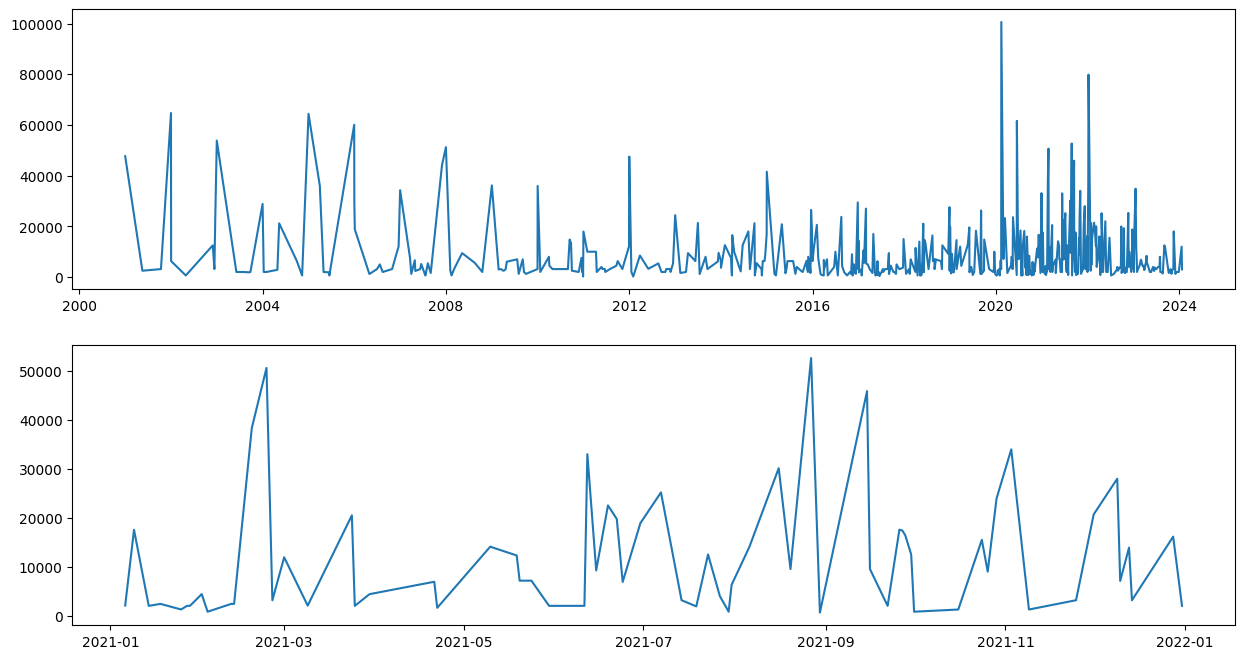

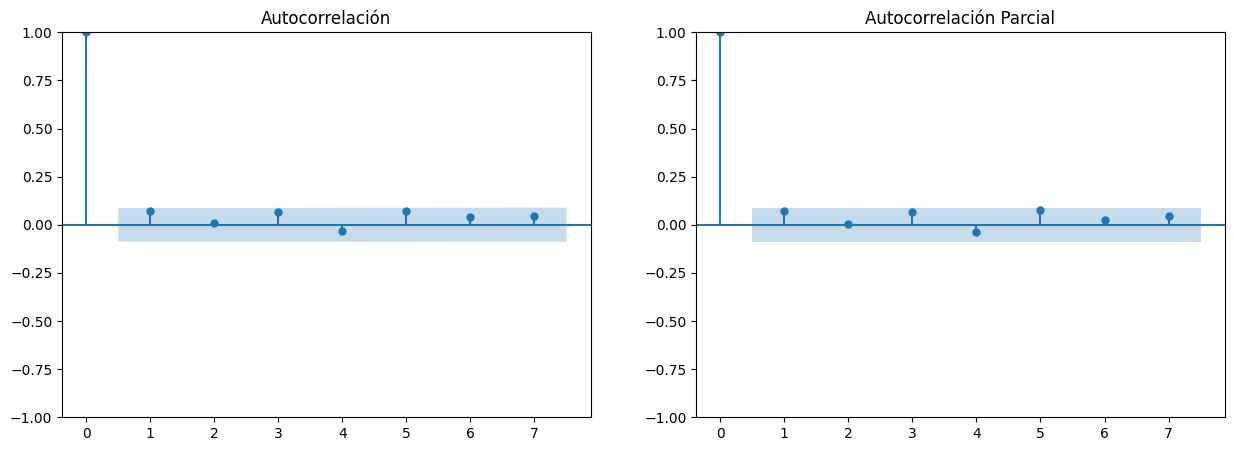

In [ ]:
Subestaciones1 = "TRIPOLAR"
filtro = "`4.9 Modo de accionamiento (monopolar o tripolar)` == '{0}'".format(Subestaciones1)

y = ds_train.query(filtro)["Corriente"]
x = ds_train.query(filtro).index

yt = ds_test.query(filtro)["Corriente"]
xt = ds_test.query(filtro).index

fig, axes = plt.subplots(2, 1)
fig.set_size_inches(15, 8)
axes[0].plot(x, y)
axes[1].plot(xt, yt)

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

print("Primeros registros de ds_train:")
print(ds_train.head())

datos_filtrados = ds_train.query(filtro)
print("Datos filtrados:")
print(datos_filtrados)

#pa ver los datos almacenaos
print(y.shape)

plot_acf(y.squeeze(), lags=7, ax=axes[0])
plot_pacf(y.squeeze(), lags=7, method="ywm", ax=axes[1])

axes[0].set_title('Autocorrelación')
axes[1].set_title('Autocorrelación Parcial')
plt.show()

<Axes: xlabel='day', ylabel='Corriente'>

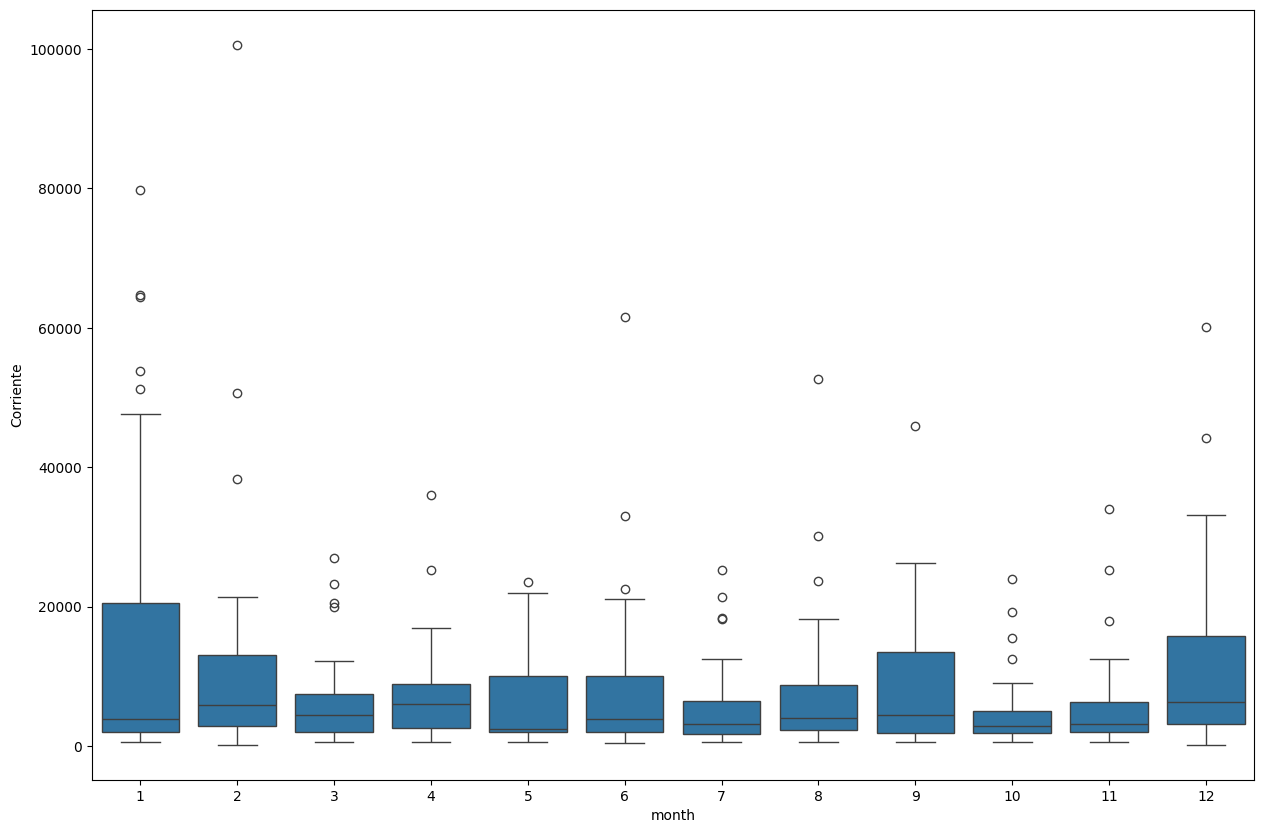

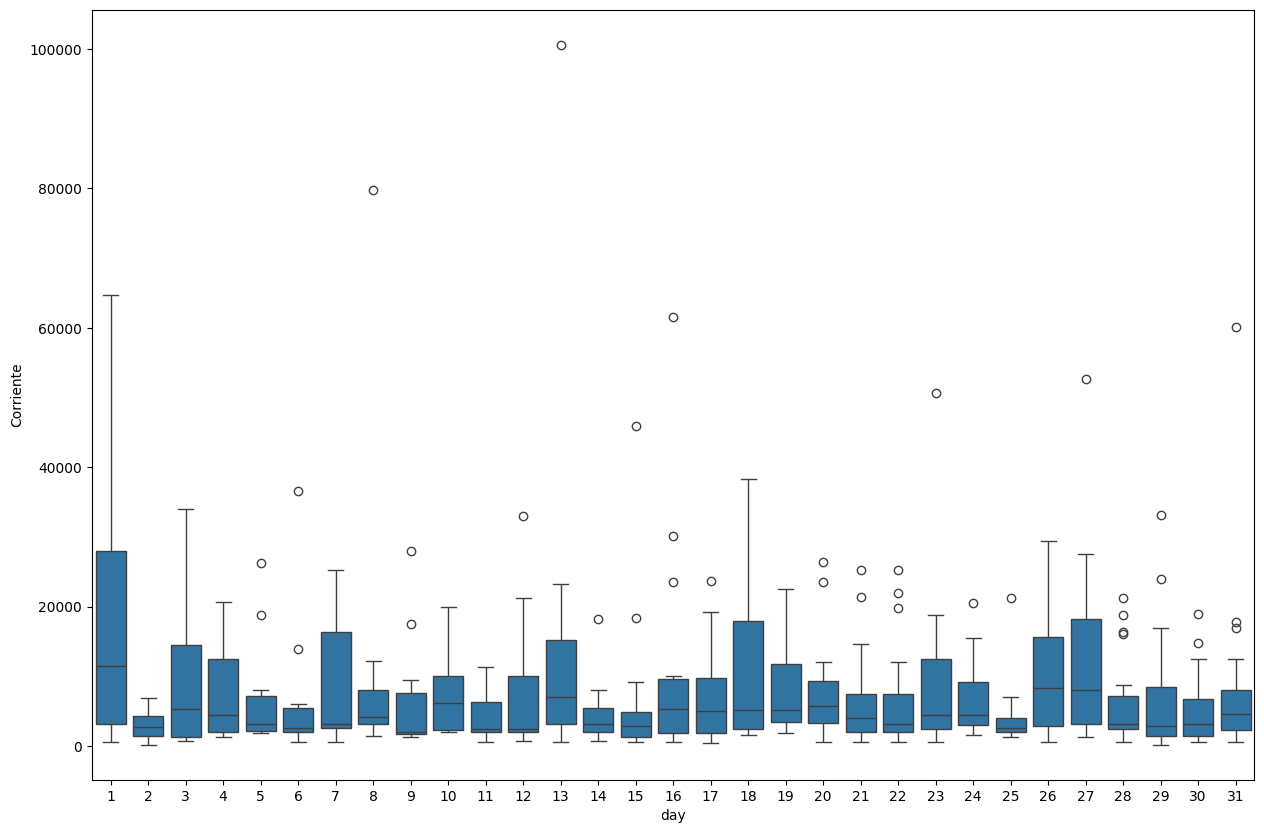

In [ ]:
import seaborn as sns

data = pd.DataFrame()
data["Corriente"] = y
data["date"] = y.index
data["day"] = data["date"].dt.day
data["month"] = data["date"].dt.month

# Crear el gráfico de caja para el mes
plt.figure(figsize=(15, 10))
sns.boxplot(x="month", y="Corriente", data=data)

# Crear el gráfico de caja para el día
plt.figure(figsize=(15, 10))
sns.boxplot(x="day", y="Corriente", data=data)



In [ ]:
data["year"]=data["date"].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 506 entries, 2001-01-01 to 2024-01-23
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Corriente  506 non-null    float64       
 1   date       506 non-null    datetime64[ns]
 2   day        506 non-null    int32         
 3   month      506 non-null    int32         
 4   year       506 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(3)
memory usage: 17.8 KB


In [ ]:
data_ys=data[["year","month","day","Corriente"]].groupby(["year","month","day"]).agg("mean")
data_ys.to_csv("data_ys.csv")

In [ ]:
from datetime import datetime
ys=[]
xs=[]
archivo=open("data_ys.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

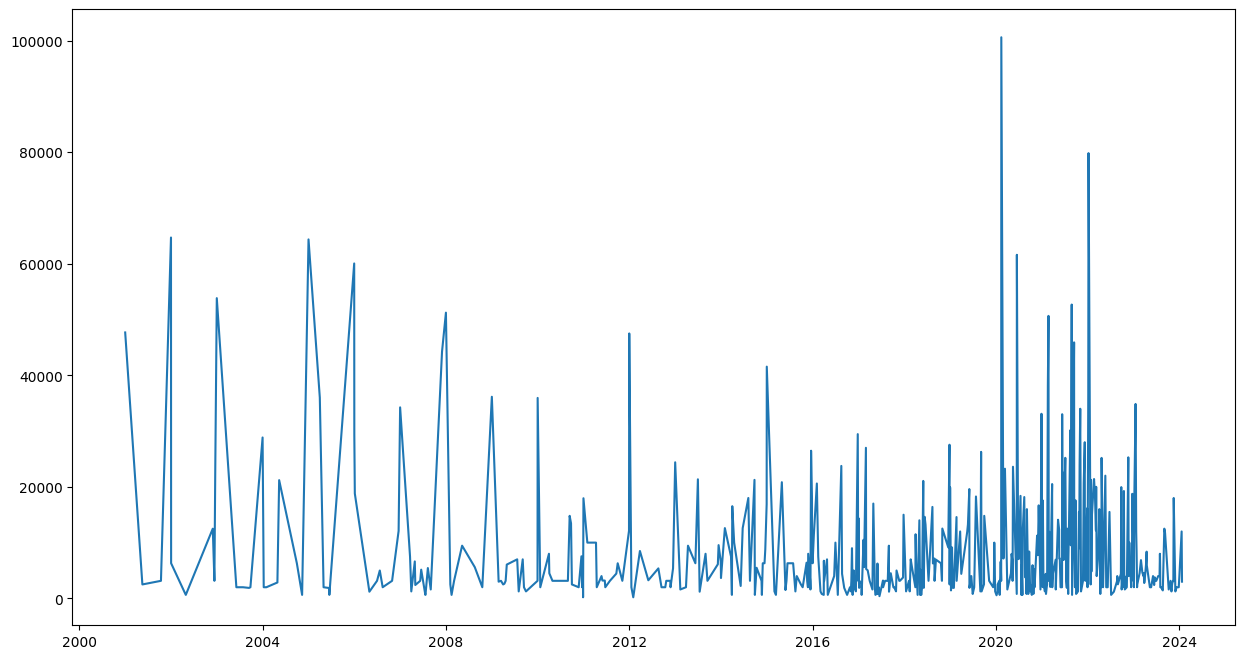

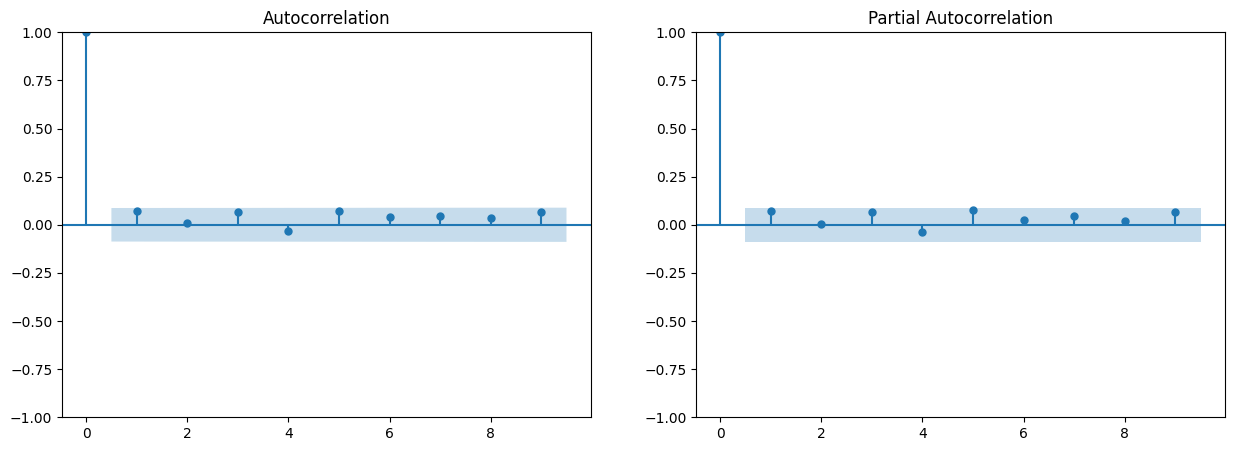

In [ ]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.184713
p-value: 0.000699
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
modelo_CENTRALALFALFAL_d=ARIMA(ys,order=(1,0,1))
m_ad1=modelo_CENTRALALFALFAL_d.fit()
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

MSE 134811386.47821903
AIC 10915.536716742157
MAPE 2.654668733130304


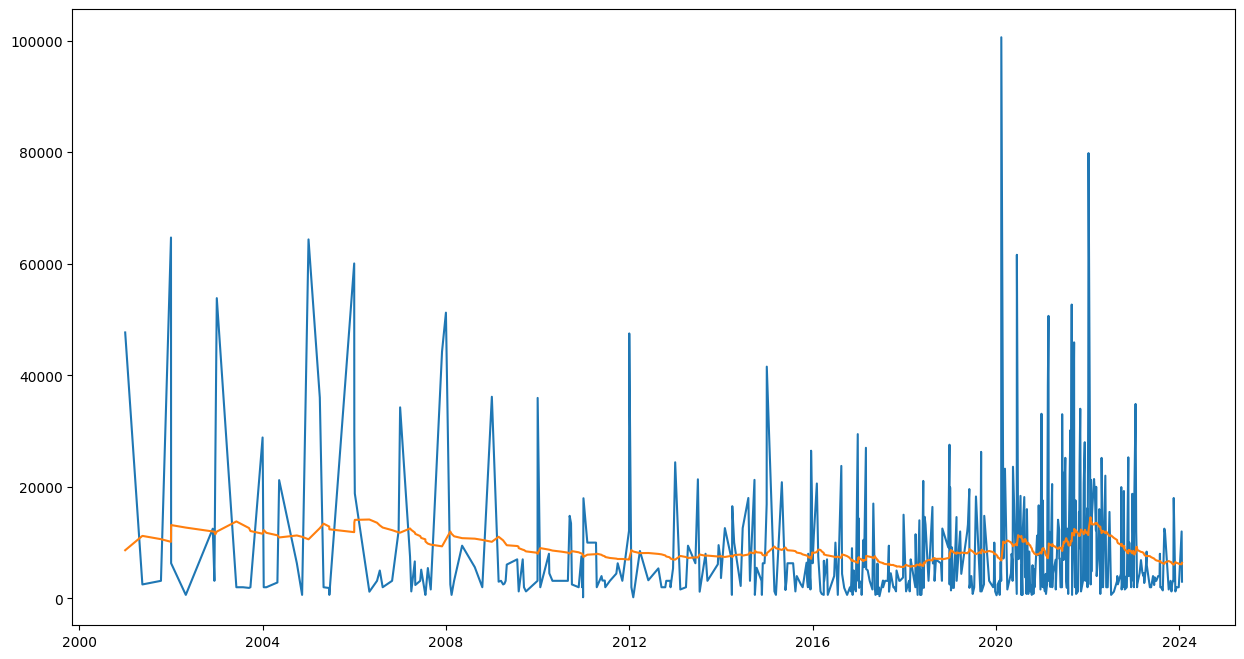

In [ ]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys,xs,ysp);

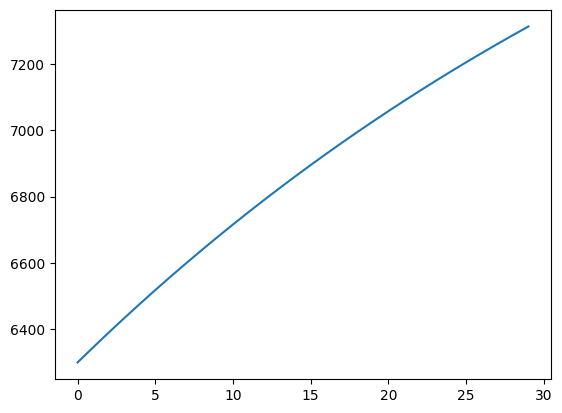

In [ ]:
m1_y1_p = m_ad1.get_forecast(steps=30)
m1_y1_ci = m_ad1.conf_int(0.05)
plt.plot(m1_y1_p.predicted_mean)

In [ ]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

498


In [ ]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [ ]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import SimpleRNN, Input, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [ ]:
seed=69420666
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Define el modelo
model = Sequential([
    Input(name="serie", shape=(8, 1)),
    SimpleRNN(256, activation='relu'),  # Añade activación ReLU
    Dense(128, activation='relu'),      # Añade activación ReLU
    Dense(1, activation='linear')
])

# Compila el modelo con una tasa de aprendizaje más baja
optimizer = Adam(learning_rate=1e-4)  # Reduce la tasa de aprendizaje
model.compile(optimizer=optimizer, loss='mse', metrics=['mse', 'mae', 'mape'])

# Entrena el modelo con un tamaño de lote más grande y más épocas
tag = "rnn" + datetime.now().strftime("%Y%m%d")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Aumenta el tamaño del lote y las épocas
rnn = model.fit(yw, yt, batch_size=512, epochs=300, verbose=1, callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 233657872.0000 - mse: 233657872.0000 - mae: 9960.8740 - mape: 157.9793
Epoch 2/300
1/1 [==============================] - 0s 200ms/step - loss: 228315888.0000 - mse: 228315888.0000 - mae: 9725.8965 - mape: 148.8944
Epoch 3/300
1/1 [==============================] - 0s 252ms/step - loss: 223233152.0000 - mse: 223233152.0000 - mae: 9495.5684 - mape: 139.9874
Epoch 4/300
1/1 [==============================] - 0s 179ms/step - loss: 218374208.0000 - mse: 218374208.0000 - mae: 9268.6992 - mape: 131.2030
Epoch 5/300
1/1 [==============================] - 0s 174ms/step - loss: 213717312.0000 - mse: 213717312.0000 - mae: 9044.5732 - mape: 122.5236
Epoch 6/300
1/1 [==============================] - 0s 202ms/step - loss: 209263104.0000 - mse: 209263104.0000 - mae: 8822.9170 - mape: 113.9556
Epoch 7/300
1/1 [==============================] - 0s 166ms/step - loss: 204995216.0000 - mse: 204995216.0000 - mae: 8604.9268 - mape: 105.

16/16 [==============================] - 0s 5ms/step


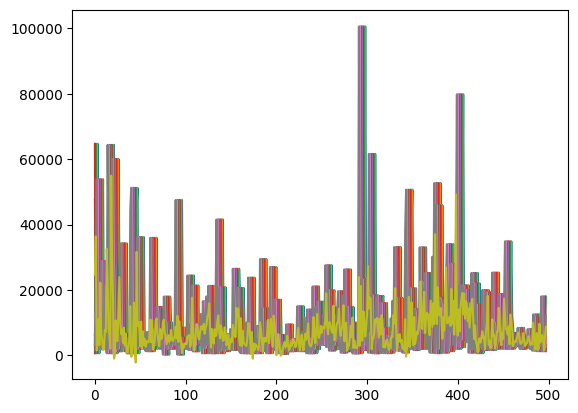

In [ ]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

1/1 [==============================] - 0s 29ms/step
8691.877
1/1 [==============================] - 0s 32ms/step
5641.855
1/1 [==============================] - 0s 31ms/step
2491.8428
1/1 [==============================] - 0s 22ms/step
4358.4575
1/1 [==============================] - 0s 20ms/step
5249.5957
1/1 [==============================] - 0s 22ms/step
5047.9077
1/1 [==============================] - 0s 33ms/step
7244.7764
1/1 [==============================] - 0s 24ms/step
8417.533
1/1 [==============================] - 0s 23ms/step
6607.5366
1/1 [==============================] - 0s 22ms/step
6553.8325
1/1 [==============================] - 0s 22ms/step
6959.7773
1/1 [==============================] - 0s 27ms/step
6832.029
1/1 [==============================] - 0s 23ms/step
6890.945
1/1 [==============================] - 0s 23ms/step
7560.0513
1/1 [==============================] - 0s 22ms/step
8181.2812
1/1 [==============================] - 0s 24ms/step
7967.231
1/1 [=========

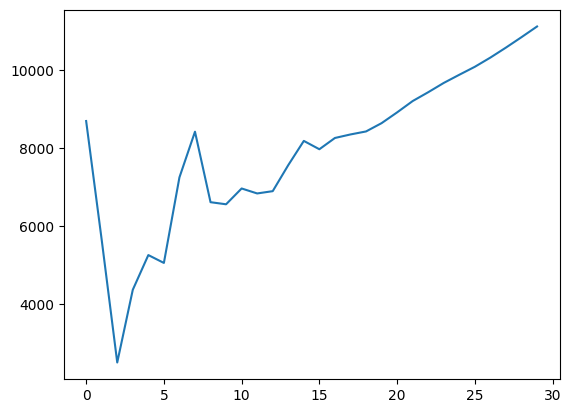

In [ ]:
ultimo=list(yw[-1].copy())
forecasts=[]
for i in range(30):
    data=np.array(np.asarray([ultimo]))
    forecast=model.predict(data)
    valor=forecast[0][0]
    print(valor)
    forecasts.append(valor)
    ultimo.pop(0)
    ultimo.append(valor)
plt.plot(forecasts)

In [ ]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=100,shuffle=True,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/100
2/2 [==============================] - 2s 159ms/step - loss: 127428312.0000 - mse: 127428312.0000 - mae: 6643.6484 - mape: 152.9453
Epoch 2/100
2/2 [==============================] - 0s 137ms/step - loss: 117891200.0000 - mse: 117891200.0000 - mae: 7371.7036 - mape: 265.4926
Epoch 3/100
2/2 [==============================] - 0s 153ms/step - loss: 101646056.0000 - mse: 101646056.0000 - mae: 5882.4570 - mape: 153.8208
Epoch 4/100
2/2 [==============================] - 0s 155ms/step - loss: 107282128.0000 - mse: 107282128.0000 - mae: 6181.6870 - mape: 151.3162
Epoch 5/100
2/2 [==============================] - 0s 135ms/step - loss: 104564088.0000 - mse: 104564088.0000 - mae: 6357.7764 - mape: 185.7090
Epoch 6/100
2/2 [==============================] - 0s 132ms/step - loss: 102180784.0000 - mse: 102180784.0000 - mae: 6341.5312 - mape: 201.3896
Epoch 7/100
2/2 [==============================] - 0s 137ms/step - loss: 99598632.0000 - mse: 99598632.0000 - mae: 5980.2007 - mape: 176

16/16 [==============================] - 0s 6ms/step


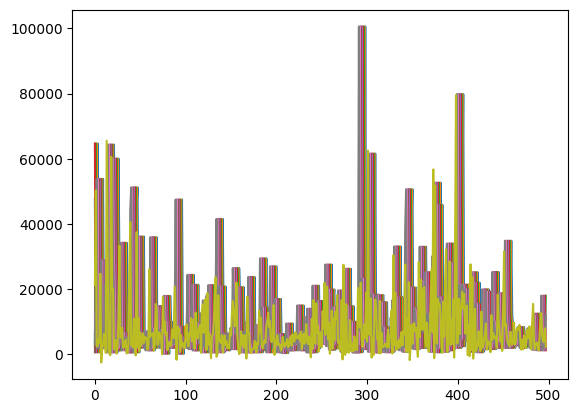

In [ ]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

1/1 [==============================] - 0s 35ms/step
2433.0154
1/1 [==============================] - 0s 30ms/step
10135.981
1/1 [==============================] - 0s 37ms/step
985.04065
1/1 [==============================] - 0s 37ms/step
4960.974
1/1 [==============================] - 0s 35ms/step
18400.318
1/1 [==============================] - 0s 37ms/step
-4528.6035
1/1 [==============================] - 0s 39ms/step
13297.567
1/1 [==============================] - 0s 30ms/step
577.5447
1/1 [==============================] - 0s 35ms/step
525.5317
1/1 [==============================] - 0s 35ms/step
5660.1777
1/1 [==============================] - 0s 41ms/step
2060.6235
1/1 [==============================] - 0s 32ms/step
1507.6997
1/1 [==============================] - 0s 25ms/step
3988.3103
1/1 [==============================] - 0s 20ms/step
1613.7173
1/1 [==============================] - 0s 22ms/step
3613.9065
1/1 [==============================] - 0s 22ms/step
2643.5566
1/1 [=====

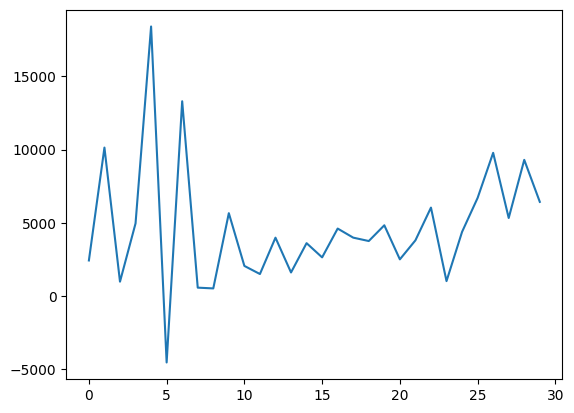

In [ ]:
ultimo=list(yw[-1].copy())
forecasts=[]
for i in range(30):
    data=np.array(np.asarray([ultimo]))
    forecast=model.predict(data)
    valor=forecast[0][0]
    print(valor)
    forecasts.append(valor)
    ultimo.pop(0)
    ultimo.append(valor)
plt.plot(forecasts)

Primeros registros de yt:
Fecha
2021-01-06     2060.0
2021-01-09    17550.0
2021-01-14     2000.0
2021-01-18     2400.0
2021-01-25     1260.0
Name: Corriente, dtype: float64
Primeros registros de xt:
DatetimeIndex(['2021-01-06', '2021-01-09', '2021-01-14', '2021-01-18',
               '2021-01-25', '2021-01-27', '2021-01-28', '2021-02-01',
               '2021-02-03', '2021-02-11'],
              dtype='datetime64[ns]', name='Fecha', freq=None)


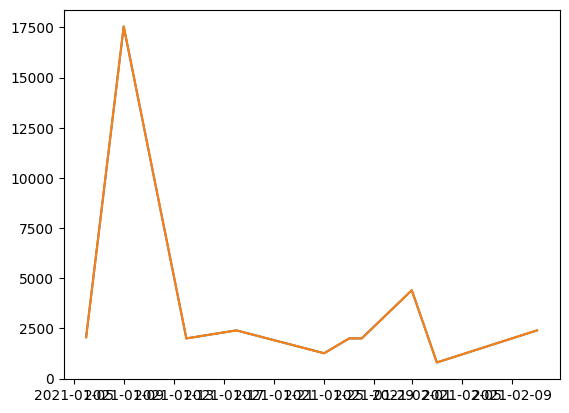

In [ ]:
yt=ds_test.query(filtro)["Corriente"]
xt=ds_test.query(filtro).index
plt.plot(xt[:10],yt[:10])

print("Primeros registros de yt:")
print(yt.head())

print("Primeros registros de xt:")
print(xt[:10])

plt.plot(xt[:10], yt[:10])
plt.show()

